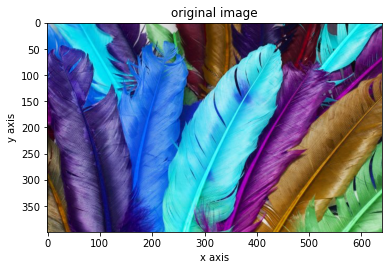

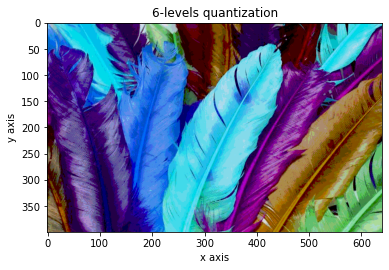

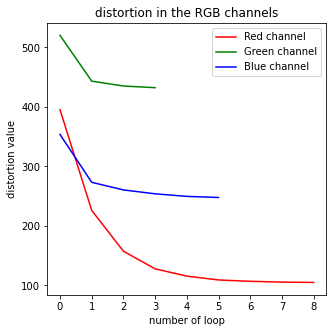

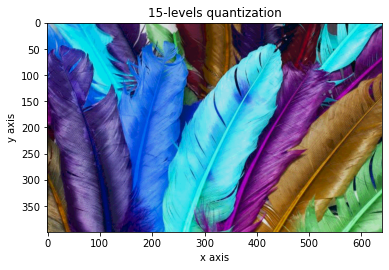

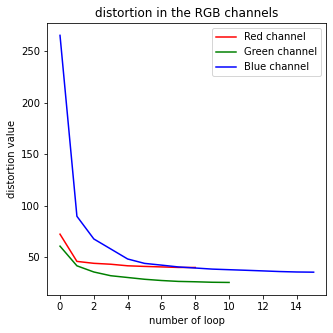

In [60]:
# imports for the HW
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

#1.a
def quantize(data, d, r):
  # create an empty array with the same shape as the input data
  out = np.empty(np.shape(data))
  # loop through the decision levels and representation levels
  for i in range(len(d) - 1):
      mask = (d[i] <= data) & (data < d[i+1])
      out[mask] = r[i]
 # handle the last level separately
  out[data >=d[-1]] = r[-1]
  return out

def max_lloyd_quantizer(data, levels, meps):
 """
 The function implements the iterative Max-Llyod algorithm for
 image quantization, and return the quantized image and some
 parameters of the quantization.
 inputs:
 data: one channel image in a uint8 format.
 levels: number of wanted different representation levels.
 meps: minimal required approximation.
 outpus:
 dataout: the image after the quantization.
 distortion: a vector with the size 1 X number of
 iterations. The vector contains the
 average distortion of the quantized
 image in each iteration.
 QL: a vector with the length of levels that contains
 the different representation levels.
 """


 data = data.astype(np.double) 
 distortion = []
 eps = 3 * meps  
 f_array = np.zeros(levels)
 r_array = np.random.uniform(np.amin(data), np.amax(data), size=levels+1)
 r_array.sort()
 counter = 0

 hist, _ = np.histogram(data, bins=256, range=(0,255))
 probility = hist / data.size

 
 for j in range(levels):
     a = [i for i in range(int(round(r_array[j])), int(round(r_array[j+1]))) if probility[i] !=0]
     if len(a) > 0:
         f_array[j] = sum(a) / len(a)


 quantized_data = quantize(data, r_array, f_array)
 curr_dm = np.mean((data-quantized_data)*(data-quantized_data))
 distortion.append(curr_dm)

 while counter < 600 and eps > meps :
     counter += 1
     for j in range(1,levels-1):
         r_array[j] = (f_array[j-1] + f_array[j])/2
     
     f_array = np.zeros(levels)


     for k in range(levels):
         sum_r = 0
         r_k=round(r_array[k])
         r_k_1 = round(r_array[k + 1])
         for i in range(r_k, r_k_1):
             sum_r = sum_r + probility[i]
             f_array[k] = f_array[k] +(probility[i]*i)
             
         if sum_r != 0:
              f_array[k] = f_array[k] / sum_r
     quantized_data = quantize(data, r_array, f_array)

    
     prev_dm = curr_dm
     curr_dm = np.mean((data-quantized_data)*(data-quantized_data))
     Numerator = np.abs(curr_dm-prev_dm) 
     eps = Numerator / prev_dm
     distortion.append(curr_dm)

 QL = f_array
 dataout = quantized_data
 return dataout, distortion, QL

#1.b
original = cv2.imread('../given_data/colorful.jpg')
plt.imshow(original)
plt.title("original image")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()

quantized_6 = np.zeros(np.shape(original))
levels=6
meps=0.01

quantized_6[:, :, 0], r_dist, r_QL = max_lloyd_quantizer(original[:, :, 0], levels, meps)
quantized_6[:, :, 2], b_dist, b_QL = max_lloyd_quantizer(original[:, :, 2], levels, meps)
quantized_6[:, :, 1], g_dist, g_QL =  max_lloyd_quantizer(original[:, :, 1], levels, meps)

quantized_6 = quantized_6.astype(np.uint8)
plt.imshow(quantized_6)
plt.title("6-levels quantization")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(r_dist, label='Red channel', color='red')
ax.plot(g_dist, label='Green channel',color='green')
ax.plot(b_dist, label='Blue channel',color='blue')
ax.legend()
plt.title('distortion in the RGB channels')
plt.ylabel('distortion')
plt.xlabel('loop number')
plt.show()


plt.show()

levels = 15
quantized_15 = np.zeros(np.shape(original))

quantized_15[:, :, 0], r_dist, r_QL = max_lloyd_quantizer(original[:, :, 0], levels, meps)
quantized_15[:, :, 2], b_dist, b_QL = max_lloyd_quantizer(original[:, :, 2], levels, meps)
quantized_15[:, :, 1], g_dist, g_QL = max_lloyd_quantizer(original[:, :, 1], levels, meps)

quantized_15 = quantized_15.astype(np.uint8)
plt.imshow(quantized_15)
plt.title("15-levels quantization")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(r_dist, label='Red channel', color='red')
ax.plot(g_dist, label='Green channel',color='green')
ax.plot(b_dist, label='Blue channel',color='blue')
ax.legend()
plt.title('distortion in the RGB channels')
plt.ylabel('distortion')
plt.xlabel('loop number')
plt.show()


plt.show()